# Multiclass Image Classification using CNN (KERAS)

## Step 1. Load data directory from Kaggle using API

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "bijoybasak" # username from the json file
os.environ['KAGGLE_KEY'] = "6eefba91ec543fd8ea9b3231d3a84261" # key from the json file

In [ ]:
!kaggle datasets download -d crowww/a-large-scale-fish-dataset

100% 3.24G/3.24G [00:49<00:00, 59.3MB/s]
100% 3.24G/3.24G [00:49<00:00, 69.9MB/s]


In [ ]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/a-large-scale-fish-dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


## Step 2. Exploratory Data Analysis (EDA) 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/Fish_Dataset/Fish_Dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/Fish_Dataset/Fish_Dataset"))
file_count = len(files)
# print(file_count)

['README.txt', 'Red Mullet', 'Sea Bass', 'license.txt', 'Trout', 'Gilt-Head Bream', 'Red Sea Bream', 'Black Sea Sprat', 'Striped Red Mullet', 'Segmentation_example_script.m', 'Hourse Mackerel', 'Shrimp']


In [ ]:
# Make new base directory
original_dataset_dir = '/content/Fish_Dataset/Fish_Dataset'
base_dir = '/content/fish-data/'
os.mkdir(base_dir)

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create nine folders 
# (Black Sea Sprat, Sea Bass, Striped Red Mullet, Red Mullet, Gilt Head Bream, Trout, Red Sea Bream, Horse Mackerel, Shrimp)

train_Black_Sea_Sprat_dir = os.path.join(train_dir, 'Black Sea Sprat')
os.mkdir(train_Black_Sea_Sprat_dir)

train_Sea_Bass_dir = os.path.join(train_dir, 'Sea Bass')
os.mkdir(train_Sea_Bass_dir)

# train_Striped_Red_Mullet_dir = os.path.join(train_dir, 'Striped Red Mullet')
# os.mkdir(train_Striped_Red_Mullet_dir)

train_Red_Mullet_dir = os.path.join(train_dir, 'Red Mullet')
os.mkdir(train_Red_Mullet_dir)

train_Gilt_Head_Bream_dir = os.path.join(train_dir, 'Gilt Head Bream')
os.mkdir(train_Gilt_Head_Bream_dir)

# train_Trout_dir = os.path.join(train_dir, 'Trout')
# os.mkdir(train_Trout_dir)

# train_Red_Sea_Bream_dir = os.path.join(train_dir, 'Red Sea Bream')
# os.mkdir(train_Red_Sea_Bream_dir)

# train_Horse_Mackerel_dir = os.path.join(train_dir, 'Horse Mackerel')
# os.mkdir(train_Horse_Mackerel_dir)

train_Shrimp_dir = os.path.join(train_dir, 'Shrimp')
os.mkdir(train_Shrimp_dir)

#Under validation folder create nine folders 
# (Black Sea Sprat, Sea Bass, Striped Red Mullet, Red Mullet, Gilt Head Bream, Trout, Red Sea Bream, Horse Mackerel, Shrimp)

validation_Black_Sea_Sprat_dir = os.path.join(validation_dir, 'Black Sea Sprat')
os.mkdir(validation_Black_Sea_Sprat_dir)

validation_Sea_Bass_dir = os.path.join(validation_dir, 'Sea Bass')
os.mkdir(validation_Sea_Bass_dir)

# validation_Striped_Red_Mullet_dir = os.path.join(validation_dir, 'Striped Red Mullet')
# os.mkdir(validation_Striped_Red_Mullet_dir)

validation_Red_Mullet_dir = os.path.join(validation_dir, 'Red Mullet')
os.mkdir(validation_Red_Mullet_dir)

validation_Gilt_Head_Bream_dir = os.path.join(validation_dir, 'Gilt Head Bream')
os.mkdir(validation_Gilt_Head_Bream_dir)

# validation_Trout_dir = os.path.join(validation_dir, 'Trout')
# os.mkdir(validation_Trout_dir)

# validation_Red_Sea_Bream_dir = os.path.join(validation_dir, 'Red Sea Bream')
# os.mkdir(validation_Red_Sea_Bream_dir)

# validation_Horse_Mackerel_dir = os.path.join(validation_dir, 'Horse Mackerel')
# os.mkdir(validation_Horse_Mackerel_dir)

validation_Shrimp_dir = os.path.join(validation_dir, 'Shrimp')
os.mkdir(validation_Shrimp_dir)



In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
Black_Sea_Sprat_SOURCE_DIR = '/content/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/'
TRAINING_Black_Sea_Sprat_DIR = '/content/fish-data/train/Black Sea Sprat/'
VALID_Black_Sea_Sprat_DIR = '/content/fish-data/validation/Black Sea Sprat/'

Sea_Bass_SOURCE_DIR = '/content/Fish_Dataset/Fish_Dataset/Sea Bass/Sea Bass/'
TRAINING_Sea_Bass_DIR = '/content/fish-data/train/Sea Bass/'
VALID_Sea_Bass_DIR = '/content/fish-data/validation/Sea Bass/'

# Striped_Red_Mullet_SOURCE_DIR = '/content/NA_Fish_Dataset/Striped Red Mullet/'
# TRAINING_Striped_Red_Mullet_DIR = '/content/fish-data/train/Striped Red Mullet/'
# VALID_Striped_Red_Mullet_DIR = '/content/fish-data/validation/Striped Red Mullet/'

Red_Mullet_SOURCE_DIR = '/content/Fish_Dataset/Fish_Dataset/Red Mullet/Red Mullet/'
TRAINING_Red_Mullet_DIR = '/content/fish-data/train/Red Mullet/'
VALID_Red_Mullet_DIR = '/content/fish-data/validation/Red Mullet/'

Glit_Head_Bream_SOURCE_DIR = '/content/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/'
TRAINING_Glit_Head_Bream_DIR = '/content/fish-data/train/Gilt Head Bream/'
VALID_Glit_Head_Bream_DIR = '/content/fish-data/validation/Gilt Head Bream/'

# Trout_SOURCE_DIR = '/content/NA_Fish_Dataset/Trout/'
# TRAINING_Trout_DIR = '/content/fish-data/train/Trout/'
# VALID_Trout_DIR = '/content/fish-data/validation/Trout/'

# Red_Sea_Bream_SOURCE_DIR = '/content/NA_Fish_Dataset/Red Sea Bream/'
# TRAINING_Red_Sea_Bream_DIR = '/content/fish-data/train/Red Sea Bream/'
# VALID_Red_Sea_Bream_DIR = '/content/fish-data/validation/Red Sea Bream/'

# Horse_Mackerel_SOURCE_DIR = '/content/NA_Fish_Dataset/Horse Mackerel/'
# TRAINING_Horse_Mackerel_DIR = '/content/fish-data/train/Horse Mackerel/'
# VALID_Horse_Mackerel_DIR = '/content/fish-data/validation/Horse Mackerel/'

Shrimp_SOURCE_DIR = '/content/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/'
TRAINING_Shrimp_DIR = '/content/fish-data/train/Shrimp/'
VALID_Shrimp_DIR = '/content/fish-data/validation/Shrimp/'

In [ ]:
import os
import random
from shutil import copyfile

split_size = .75

split_data(Black_Sea_Sprat_SOURCE_DIR, TRAINING_Black_Sea_Sprat_DIR, VALID_Black_Sea_Sprat_DIR, split_size)
split_data(Sea_Bass_SOURCE_DIR, TRAINING_Sea_Bass_DIR, VALID_Sea_Bass_DIR, split_size)
#split_data(Striped_Red_Mullet_SOURCE_DIR, TRAINING_Striped_Red_Mullet_DIR, VALID_Striped_Red_Mullet_DIR, split_size)
split_data(Red_Mullet_SOURCE_DIR, TRAINING_Red_Mullet_DIR, VALID_Red_Mullet_DIR, split_size)
split_data(Glit_Head_Bream_SOURCE_DIR, TRAINING_Glit_Head_Bream_DIR, VALID_Glit_Head_Bream_DIR, split_size)
#split_data(Trout_SOURCE_DIR, TRAINING_Trout_DIR, VALID_Trout_DIR, split_size)
#split_data(Red_Sea_Bream_SOURCE_DIR, TRAINING_Red_Sea_Bream_DIR, VALID_Red_Sea_Bream_DIR, split_size)
#split_data(Horse_Mackerel_SOURCE_DIR, TRAINING_Horse_Mackerel_DIR, VALID_Horse_Mackerel_DIR, split_size)
split_data(Shrimp_SOURCE_DIR, TRAINING_Shrimp_DIR, VALID_Shrimp_DIR, split_size)


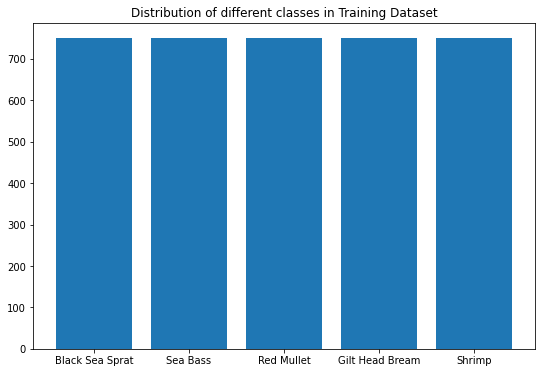

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Gilt Head Bream', 'Shrimp']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/fish-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Gilt Head Bream', 'Shrimp']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/fish-data/train/'+i+'/'))))

Training Black Sea Sprat images are: 750
Training Sea Bass images are: 750
Training Red Mullet images are: 750
Training Gilt Head Bream images are: 750
Training Shrimp images are: 750


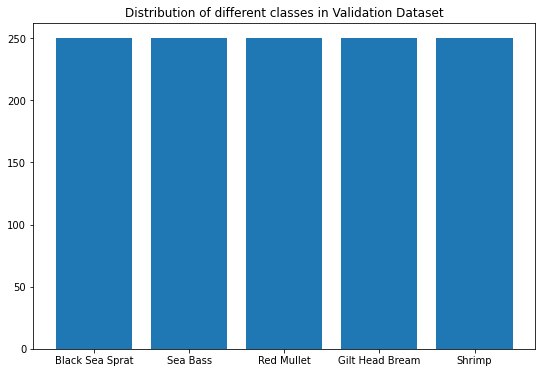

In [ ]:
image_folder = ['Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Gilt Head Bream', 'Shrimp']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/fish-data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [ ]:
for i in ['Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Gilt Head Bream', 'Shrimp']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/fish-data/validation/'+i+'/'))))

Valid Black Sea Sprat images are: 250
Valid Sea Bass images are: 250
Valid Red Mullet images are: 250
Valid Gilt Head Bream images are: 250
Valid Shrimp images are: 250


## Step 3. Deep Learning with Data Augumentation 

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
img_width=224; img_height=224
batch_size=32

In [ ]:
TRAINING_DIR = '/content/fish-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 3750 images belonging to 5 classes.


In [ ]:
VALIDATION_DIR = '/content/fish-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 1250 images belonging to 5 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2), strides=2,padding='valid'),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2, padding='valid'),

    Conv2D(128, (3, 3), padding='same' ,activation='relu'),
    MaxPooling2D((2, 2), strides=2, padding='valid'),

    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(5, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model],
                              )

Epoch 1/5
118/118 [==============================] - ETA: 0s - loss: 1.2338 - accuracy: 0.4349
Epoch 00001: val_accuracy improved from -inf to 0.74240, saving model to /content/best_weights.h5
118/118 [==============================] - 91s 675ms/step - loss: 1.2338 - accuracy: 0.4349 - val_loss: 0.6739 - val_accuracy: 0.7424
Epoch 2/5
118/118 [==============================] - ETA: 0s - loss: 0.6895 - accuracy: 0.7061
Epoch 00002: val_accuracy improved from 0.74240 to 0.80480, saving model to /content/best_weights.h5
118/118 [==============================] - 79s 674ms/step - loss: 0.6895 - accuracy: 0.7061 - val_loss: 0.5133 - val_accuracy: 0.8048
Epoch 3/5
118/118 [==============================] - ETA: 0s - loss: 0.4794 - accuracy: 0.7957
Epoch 00003: val_accuracy improved from 0.80480 to 0.89920, saving model to /content/best_weights.h5
118/118 [==============================] - 79s 673ms/step - loss: 0.4794 - accuracy: 0.7957 - val_loss: 0.3046 - val_accuracy: 0.8992
Epoch 4/5
118

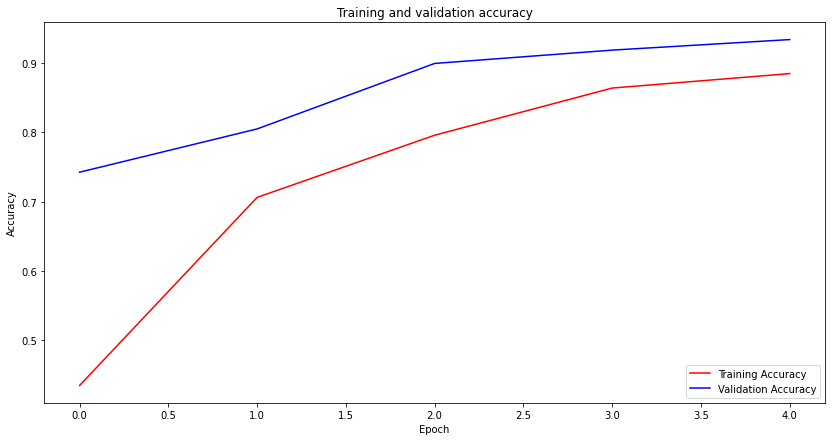

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

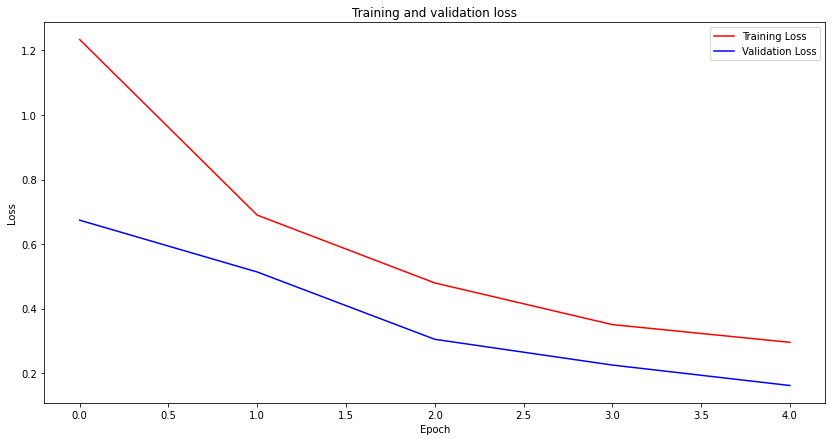

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
model.load_weights("/content/best_weights.h5")
# loss, acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
TESTING_Directory = '/content/NA_Fish_Dataset/'

test_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(TESTING_Directory,
                                                  classes={
                                                      'Black Sea Sprat':0,
                                                      'Gilt Head Bream':1,
                                                      'Red Mullet':2,
                                                      'Red Sea Bream':3,
                                                      'Shrimp':4
                                                  },
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 250 images belonging to 5 classes.


In [ ]:
filenames = test_generator.filenames
evaluate = model.evaluate(test_generator, verbose=1, use_multiprocessing=True)

8/8 [==============================] - 13s 2s/step - loss: 0.5033 - accuracy: 0.8160


In [ ]:
print("Loss: ", evaluate[0]*100)

Loss:  50.32891631126404


In [ ]:
print("Accuracy: ", evaluate[1]*100)

Accuracy:  81.5999984741211


In [ ]:
#Testing the model
from google.colab import files
uploaded = files.upload()

Saving 00002.png to 00002.png


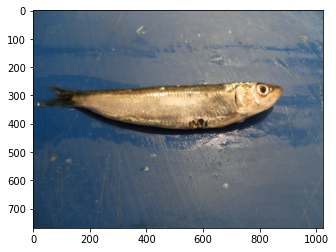

In [ ]:
#Showing image
uploaded_img = plt.imread('00002.png',0)
img = plt.imshow(uploaded_img)

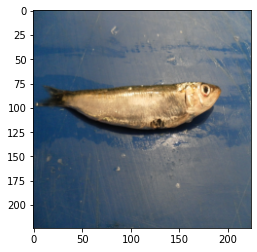

In [ ]:
#Resizing image
from skimage.transform import resize
resized_img = resize(uploaded_img, (img_height,img_width,3))
img = plt.imshow(resized_img)

In [ ]:
#Getting the models prediction
import numpy as np
pred = model.predict(np.array([resized_img]))

#Showing predictions
pred

array([[0.996249  , 0.06795175, 0.00909863, 0.91279334, 0.01809072]],
      dtype=float32)

In [ ]:
#Sorting predictions descending
list_index = [0,1,2,3,4]
x = pred

for i in range(5):
  for j in range(5):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
  
#showing sorted label in order
img_labels = ['Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Gilt Head Bream', 'Shrimp']
for i in list_index:
  print(img_labels[i], end = "\n")

Black Sea Sprat
Gilt Head Bream
Sea Bass
Shrimp
Red Mullet


In [ ]:
#print the first 5 most likely classifications
for i in range(5):
  print(img_labels[list_index[i]], ':', pred[0][list_index[i]]*100, '%')

Black Sea Sprat : 99.62490200996399 %
Gilt Head Bream : 91.27933382987976 %
Sea Bass : 6.79517462849617 %
Shrimp : 1.8090715631842613 %
Red Mullet : 0.9098629467189312 %
